In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 463 kB 36.9 MB/s 
     |████████████████████████████████| 1.3 MB 52.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220

In [3]:
!ls /content/gdrive/MyDrive/GAN/Utility_GAN/

cifar10.py  __pycache__


In [4]:
import sys
sys.path.append('/content/gdrive/MyDrive/GAN/Utility_GAN/')

In [5]:
from cifar10 import *
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.cifar10 import load_data

In [6]:
(X_train, y_train), (X_test, y_test)=load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

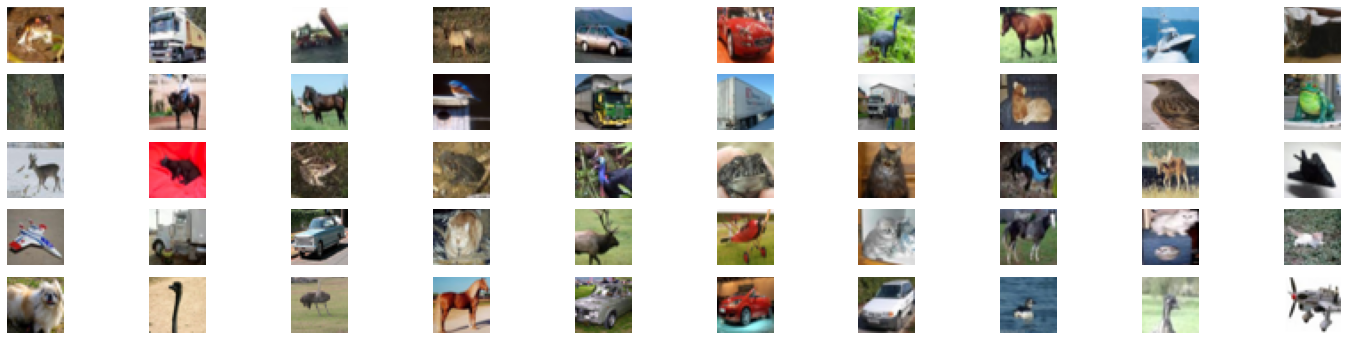

In [8]:
plt.figure(figsize=(25, 6))
for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

plt.show()

In [9]:
letent_dimension=100

In [10]:
dis=discriminator(conditional_gan=True, n_classes=10)
print(dis.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        500         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 1, 1024)      52224       ['embedding[0][0]']              
                                                                                                  
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
gen=generator(latent_dim=letent_dimension, conditional_gan=True, n_classes=10)
print(gen.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 8192)         827392      ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 50)        500         ['input_3[0][0]']                
                                                                                            

In [12]:
gan_model=define_gan(gen=gen, dis=dis, conditional_gan=True)
print(gan_model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 8192)         827392      ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 50)        500         ['input_3[0][0]']                
                                                                                            

In [13]:
dataset=load_real_samples(conditional_gan=True)

In [14]:
train(gen, dis, gan_model, dataset, letent_dimension, 20, 64, True, '/content/gdrive/MyDrive/GAN/cifar10_generator(Conditional).h5')

Streaming output truncated to the last 5000 lines.
Epoch>14, Batch 467/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.291
Epoch>14, Batch 468/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.336
Epoch>14, Batch 469/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.268
Epoch>14, Batch 470/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.291
Epoch>14, Batch 471/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.220
Epoch>14, Batch 472/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.217
Epoch>14, Batch 473/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.280
Epoch>14, Batch 474/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.277
Epoch>14, Batch 475/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.343
Epoch>14, Batch 476/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.339
Epoch>14, Batch 477/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=20.293
Epoch>14, Batch 478/781, dl_r=0.000,

Epoch>20, Batch 781/781, dl_r=0.000, da_r=1.000, dl_f=0.000, da_f=1.000, gl=23.342


In [15]:
def show_plot(examples, n):
  plt.figure(figsize=(25, 6))
  for i in range(n * n):
    plt.subplot(n, n, 1+i)
    plt.axis('off')
    plt.imshow(examples[i, :, :, :])
  plt.show()

In [16]:
from keras.models import load_model

In [17]:
model=load_model('/content/gdrive/MyDrive/GAN/cifar10_generator(Conditional).h5')

In [18]:
latent_points, labels=generate_latent_points(100, 100, conditional_gan=True)
labels=np.asarray([x for _ in range(10) for x in range(10)])

In [19]:
X=model.predict([latent_points, labels])

In [20]:
X=(X+1) / 2.0

In [21]:
X=(X*255).astype(np.uint8)

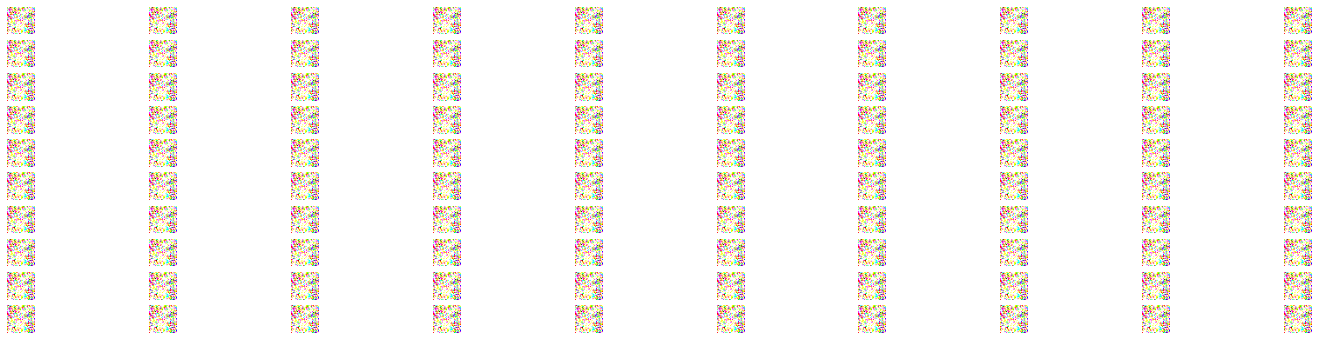

In [22]:
show_plot(X, 10)